==========
Davis Club
==========

## Davis Southern Club Women

#### Summer 2021
**Authors:** GOAT Team (Estaban Aramayo, Ethan Haley, Claire Meyer, and Tyler Frankenburg)

The assignment below shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
import numpy as np

#### Read the graph data into a variable

In [3]:
G = nx.davis_southern_women_graph()

#### Check if G is a bipartite Graph

In [4]:
print(nx.is_bipartite(G))

True


#### Show basic info about the graph

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


#### Plot the bipartite Graph

C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


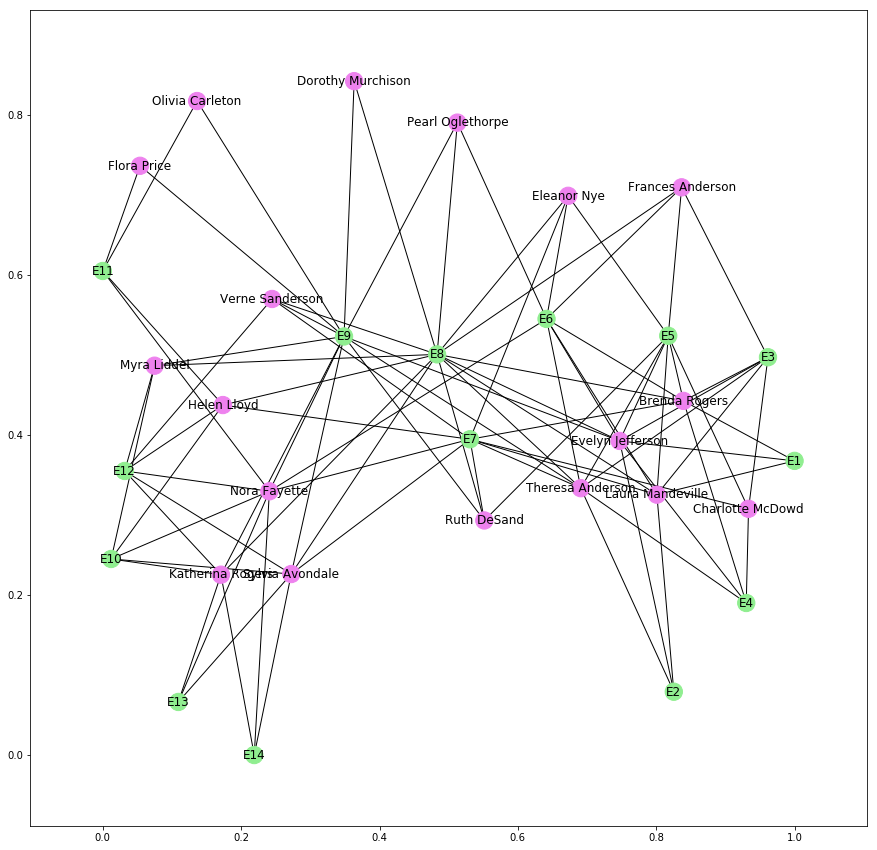

In [67]:
colors = []
for node in G:
    if node in G.graph["top"]:
        colors.append("violet")
    else: colors.append("lightgreen")

plt.figure(figsize=(15,15))
nx.draw_networkx(G, node_color=colors)
plt.show()

#### Show some of the nodes of the Graph and their metadata to see the nodes' structure

In [9]:
print(G.nodes(data=True)[0:5])

[('Evelyn Jefferson', {'bipartite': 0}), ('Laura Mandeville', {'bipartite': 0}), ('Theresa Anderson', {'bipartite': 0}), ('Brenda Rogers', {'bipartite': 0}), ('Charlotte McDowd', {'bipartite': 0})]


#### Show some of the edges of the Graph and their metadata to see the edges' structure

In [10]:
print(G.edges(data=True)[:5])

[('Evelyn Jefferson', 'E1', {}), ('Evelyn Jefferson', 'E2', {}), ('Evelyn Jefferson', 'E3', {}), ('Evelyn Jefferson', 'E4', {}), ('Evelyn Jefferson', 'E5', {})]


### Prepare the node lists needed for computing projections

In [13]:
women = G.graph["top"]
clubs = G.graph["bottom"]

In [26]:
# Project graph to women (weighted)
womenG_weighted = nx.bipartite.weighted_projected_graph(G, women)

# Project graph to clubs (weighted)
clubsG_weighted = nx.bipartite.weighted_projected_graph(G, clubs)

C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


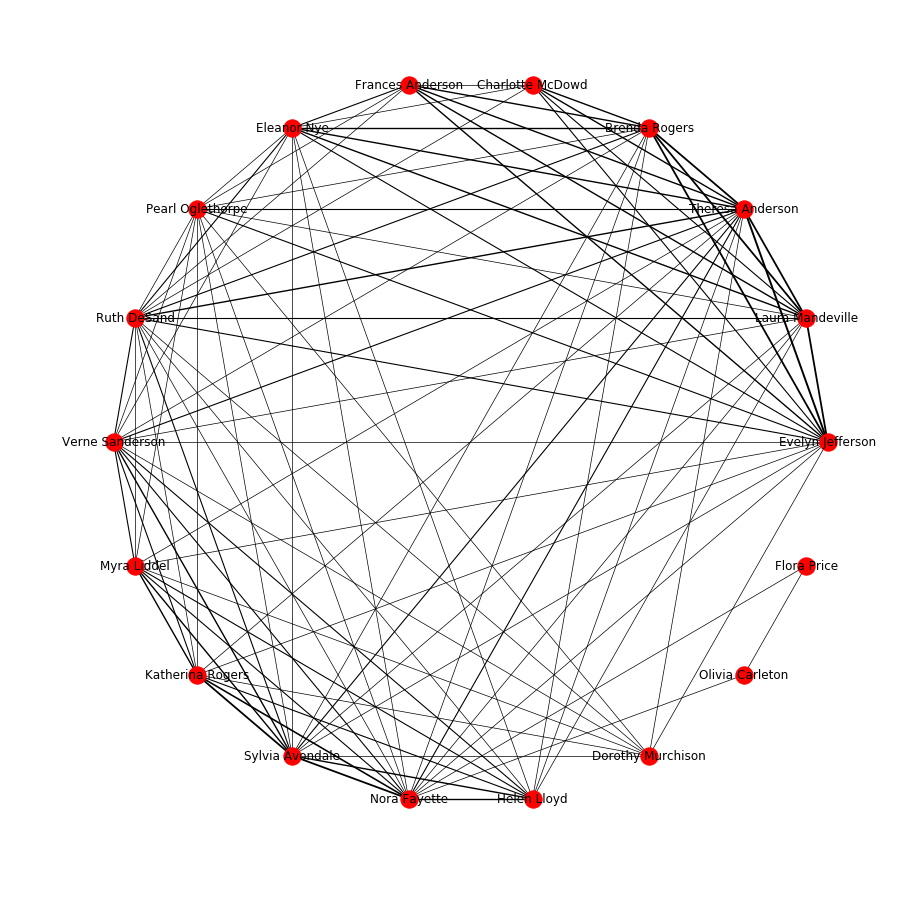

In [74]:
weights=[math.log(edata['weight']) for f, t, edata in womenG_weighted.edges(data=True)]

plt.figure(figsize=(12,12))
nx.draw_circular(womenG_weighted, with_labels=True, width=weights)
plt.show()

### Compute the women and clubs projections: womenG, clubsG

In [34]:
# Project graph to women
womenG = nx.bipartite.projected_graph(G, women)

# Project graph to clubs
clubsG = nx.bipartite.projected_graph(G, clubs)

### Plot the degree centrality distribution of both node projected partitions from the original graph

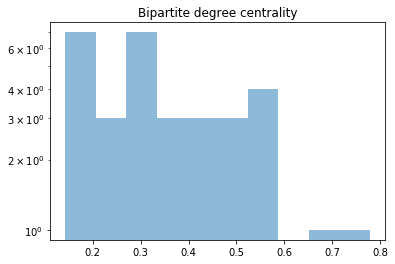

In [35]:
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, womenG)
plt.hist(original_dc.values(), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()

### Plot the degree centrality distribution of the womenG graph

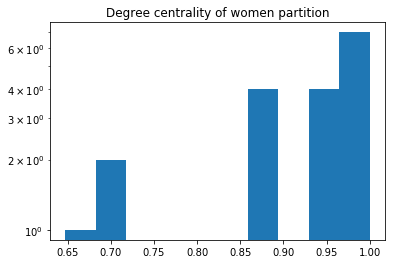

In [36]:
plt.figure()  
women_dc = nx.degree_centrality(womenG)
plt.hist(women_dc.values())
plt.yscale('log')
plt.title('Degree centrality of women partition')
plt.show()

### Plot the degree centrality distribution of the clubsG graph

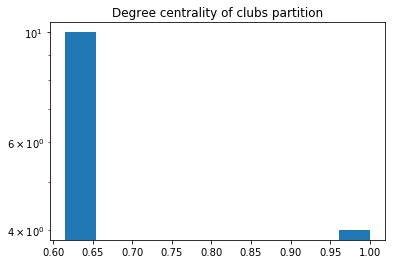

In [37]:
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(clubs_dc.values())
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

### Get the matrix representation of the bipartite graph by computing its bipartite adjacency matrix: bi_matrix

In [38]:
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=women, column_order=clubs)
print("Biadjacency matrix")
print()
print(bi_matrix)

Biadjacency matrix

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Calculate the projection of the Graph by using matrices.

To compute the projection matrix we can use the bipartite adjacency matrix "bi_matrix" multiplied by its transposed matrix version

In [39]:
# Use matrix multiplication
projection_matrix = bi_matrix @ bi_matrix.T

print("Projection Matrix")
print()
print(projection_matrix)

Projection Matrix

  (0, 17)	1
  (0, 16)	1
  (0, 15)	2
  (0, 14)	1
  (0, 12)	2
  (0, 11)	2
  (0, 10)	2
  (0, 9)	2
  (0, 13)	2
  (0, 7)	3
  (0, 8)	3
  (0, 6)	3
  (0, 5)	4
  (0, 4)	3
  (0, 2)	7
  (0, 3)	6
  (0, 1)	6
  (0, 0)	8
  (1, 15)	1
  (1, 11)	1
  (1, 10)	1
  (1, 14)	2
  (1, 12)	2
  (1, 9)	2
  (1, 13)	2
  :	:
  (16, 17)	2
  (16, 16)	2
  (16, 15)	1
  (16, 13)	2
  (16, 12)	1
  (16, 11)	1
  (16, 10)	1
  (16, 9)	1
  (16, 8)	1
  (16, 7)	1
  (16, 2)	1
  (16, 0)	1
  (17, 14)	1
  (17, 17)	2
  (17, 16)	2
  (17, 15)	1
  (17, 13)	2
  (17, 12)	1
  (17, 11)	1
  (17, 10)	1
  (17, 9)	1
  (17, 8)	1
  (17, 7)	1
  (17, 2)	1
  (17, 0)	1


### Plot the projection graph using the projection matrix

In [56]:
G2 = nx.from_scipy_sparse_matrix(projection_matrix)

weights = projection_matrix
print(weights)

#nx.draw_circular(G2, width=weights)

  (0, 17)	1
  (0, 16)	1
  (0, 15)	2
  (0, 14)	1
  (0, 12)	2
  (0, 11)	2
  (0, 10)	2
  (0, 9)	2
  (0, 13)	2
  (0, 7)	3
  (0, 8)	3
  (0, 6)	3
  (0, 5)	4
  (0, 4)	3
  (0, 2)	7
  (0, 3)	6
  (0, 1)	6
  (0, 0)	8
  (1, 15)	1
  (1, 11)	1
  (1, 10)	1
  (1, 14)	2
  (1, 12)	2
  (1, 9)	2
  (1, 13)	2
  (1, 7)	2
  (1, 8)	3
  (1, 6)	4
  (1, 5)	4
  (1, 4)	3
  (1, 2)	6
  (1, 3)	6
  (1, 1)	7
  (1, 0)	6


## Find shared membership: Transposition


### Using the projection matrix find the names of women who were members of the most number of clubs

In [87]:
# Find out the names of people who were members of the most number of clubs
diag = projection_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print()
print('Number of clubs: {0}'.format(diag.max()))
print()
print('People with the most number of memberships:')
print()
for i in indices:
    print('- {0}'.format(women[i]))



Number of clubs: 8

People with the most number of memberships:

- Evelyn Jefferson
- Theresa Anderson
- Nora Fayette


### Find pairs of women who shared membership in the most number of clubs

In [88]:

# Set the diagonal to zero and convert it to a coordinate matrix format
projection_matrix.setdiag(0)
projection_coor = projection_matrix.tocoo()

# Find pairs of women who shared membership in the most number of clubs
indices2 = np.where(projection_coor.data == projection_coor.data.max())[0]
print()
print('Women with most number of shared memberships:')
print()
for idx in indices2:
    print('- {0}, {1}'.format(women[projection_coor.row[idx]], women[projection_coor.col[idx]]))  


Women with most number of shared memberships:

- Evelyn Jefferson, Theresa Anderson
- Theresa Anderson, Evelyn Jefferson


### Members (women) and their number of friends

In [95]:
print()
print("# Friends, Member")
print()
for w in women:
    print(f"{womenG.degree(w)} {w}")


# Friends, Member

17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


### Members (women) and number of friend meetings

In [61]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
print()
print("#Friend meetings, Member")
print()
for w in women:
    print(f"{womenG_weighted.degree(w, weight='weight')} {w}")
    


#Friend meetings, Member

50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


### What can you infer about the relationships between (1) the women, and (2) the social events?

From the first figure, we can see that there are two 'cliques' of women who are connected strongly through a number of social events.  We see the strength of these intra-clique relationships validated in the second graph as the heavy edge-lines between women in the top-right and bottom-left quadrants of the graph.

However, there are 3 social events, **E7**, **E8**, and **E9**, which unify the cliques as well as women disconnected from either clique.  The centrality of these three events serves to unify the network as a whole.